# Introduction

Prostate cancer (PCa) is the second most frequent malignancy (after lung cancer) in men worldwide, counting $1,276,106$ new cases and causing $358,989$ deaths ($3.8\%$ of all deaths caused by cancer in men) in $2018$ [1]. Early detection of prostate cancer allows for appropriate management of the disease, and prognostic biomarkers can help clinicians make an appropriate therapeutic decision for each patient and avoid unnecessary treatment [2].
  
Due to recent progress in imaging, and particularly in MRI, the so-called multi-parametric MRI (mpMRI) that combines T2-weighted imaging (T2W) with functional pulse sequences such as diffusion-weighted imaging (DWI) or dynamic contrast-enhanced (DCE) imaging has shown excellent results in PCa detection and has become the standard of care to achieve accurate and reproducible diagnosis of PCa [3,4].

Pharmacokinetic modeling of the DCE-MRI signal is used to derive estimates of factors related to blood volume and permeability that are hallmarks of the angiogenic phenotype associated with most cancers. The accuracy of DCE relies on the ability to model the pharmacokinetics of an injected tracer, or contrast agent, using the signal intensity changes on sequential magnetic resonance images. 

The first pharmacokinetic model was proposed by Kety [5], who described flow-limited tracer uptake in tissue. This was followed by several pharmacokinetic models proposed by Tofts et al [6], Brix et al [7], and Larsson et al [8]. 

The majority of these models are based on the characterization of the contrast exchange rate between the plasma and the extracellular space through parameters such as $K^{trans}$, that represents the rate at which the contrast agent transfers from the blood to the interstitial space (indicating the tumor microcirculation), the reflux constant, $K_{ep}$, that reflects the rate at which the contrast agent transfers from the extravascular extracellular space back to the blood and the extravascular extracellular leakage volume fraction $v_{e}$, which predominantly reflects the percentage of contrast agent in the extravascular extracellular space.

The study of these parameters helps characterize prostate cancer, so estimating them accurately and robustly is a fundamental step. These parameters are calculated using the Tofts model [9], which is equivalent to the generalized kinetic model [10],

\begin{equation}
   \hspace{7cm} \frac{dC_t}{dt} = K^{trans}C_p - k_{ep}C_t     \hspace{7cm}  (1)
\end{equation}

where interesting parameters are $K^{trans}$, which is the transfer coefficient between blood plasma and the compartment, and the extracellular extravascular fractional volume (EES) ($v_e$). Also $k_{ep}$ is defined as $k_{ep} = K^{trans}/v_e$, and $C_t$ is the concentration of lesson tissue defined as $C_t = C_1 v_e$, where $C_1$ is the leakage space concentration. 

To solve equation $(1)$, we use the same approach as [11]. There, the model is restructured and expressed as a convolution as following,

\begin{equation}
  \hspace{4cm}  f(t) = K^{trans} \left( a(t) \otimes \frac{e^{-t/T}}{T} \right) \equiv K^{trans} \frac{1}{T}\int_0^t d\tau\, a(\tau) e^{-(t-\tau)/T}  \hspace{3cm}  (2)
\end{equation}

where $T = 1/k_{ep}$ and $a(t)$ function is an experimental measure, so is only available at discrete times. The previous model is evaluated for values of $T \neq 0$ by interpolating linearly between the measured values of $a(t)$. Instead, for $T = 0$ the result is $f(t) = a(t)$.

Our case study consists on a prostate image with $256\times256\times56$ voxels and $30$ time points for each one. We have fitted this image using the equation $(2)$ implemented at the provided code in the APRICOT repository, which uses the ROOT libraries from CERN [2]. This analysis has been performed using a MPI cluster with $3$ working nodes, reducing the total computation time almost a factor $3$ compared with the same experimentation performed on a single node. The following sections will show how to reproduce this experiment.

## References

[1] P. Rawla. Epidemiology of prostate cancer. World Journal of Oncology, 10(2), 2019.  
[2] K. M. V. T. R. P. K.-L. P. Wu X, Reinikainen P. Dynamic contrast-enhanced imaging as a prognostic tool in early diagnosis of prostate cancer: Correlation with psa and clinical stage. Contrast Media Mol Imaging, 2018.  
[3] F. Bratan, E. Niaf, C. Melodelima, A. L. Chesnais, R. Souchon, F. Mège-Lechevallier, M. Colombel, and O. Rouvière. Influence of imaging and histological factors on prostate cancer detection and localisation on multi-parametric mri: a prospective study. European Radiology, 23(7):2019–2029, Jul 2013.  
[4] J. D. Le, N. Tan, E. Shkolyar, D. Y. Lu, L. Kwan, L. S. Marks, J. Huang, D. J. Margolis, S. S. Raman, and R. E. Reiter. Multifocality and prostate cancer detection by multiparametric magnetic resonance imaging: Correlation with whole-mount histopathology. European Urology, 67(3):569 – 576, 2015.  
[5] S. S. KETY. The theory and applications of the exchange of inert gas at the lungs and tissues. Pharmacological Reviews, 3(1):1–41, 1951.  
[6] B. G. Tofts PS, Wicks DA. The mri measurement of nmr and physiological parameters in tissue to study disease process. Prog Clin Biol Res, 1991.  
[7] Gunnar Brix;Wolfhard Semmler;Rüdiger Port;Lothar Schad;Günter Layer;Walter Lorenz. Pharmacokinetic parameters in cns gd-dtpa enhanced mr imaging. Journal of Computer Assisted Tomography, 1991.  
[8] H. B. W. Larsson, M. Stubgaard, J. L. Frederiksen, M. Jensen, O. Henriksen, and O. B. Paulson. Quantitation of blood-brain barrier defect by magnetic resonance imaging and gadolinium-dtpa in patients with multiple sclerosis and brain tumors. Magnetic Resonance in Medicine, 16(1):117–131, 1990.  
[9] P. S. Tofts and A. G. Kermode. Measurement of the blood-brain barrier permeability and leakage space using dynamic mr imaging. 1. fundamental concepts. Magnetic Resonance in Medicine, 17(2):357–367, 1991.  
[10] K. M. Donahue, R. M. Weisskoff, and D. Burstein. Water diffusion and exchange as they influence contrast enhancement. Journal of Magnetic Resonance Imaging, 7(1):102–110, 1997.  
[11] D. Flouri, D. Lesnic, and S. P. Sourbron. Fitting the two-compartment model in dce-mri by linear inversion. Magnetic Resonance in Medicine, 76(3):998–1006, 2016.  
[12] R. Brun and F. Rademakers. Root — an object oriented data analysis framework. Nuclear Instruments and Methods in Physics Research Section A: Accelerators, Spectrometers, Detectors and Associated Equipment, 389(1):81 – 86, 1997. New Computing Techniques in Physics Research V.  

# Infrastructure configuration

To reproduce this experimentation, we have used a MPI cluster consisting on three nodes and one frontend. All instances have been configured with a ubuntu 16 as SO, $1$ vCPU and $4$ GB of RAM.

# Experiment

Once the theoretical aspects of the experimentation have been discussed and the suggested infrastructure described, we can begin with the experiment itself. First of all, we need to install the local dependencies. The only requirement is the matplotlib package, which will be used to plot the results.

In [2]:
from pip._internal import main as pipmain
pipmain(["install","--user", "matplotlib"])

You should consider upgrading via the 'pip install --upgrade pip' command.


0

## Cluster configuration

Now, to simplify the notebook reproduction, save the deployed cluster name and SO username in the variables "clusterName" and "username" respectively. In addition, we will define a list with the working nodes where the experimentation jobs will be executed. In our case, we deployed a cluster with 3 working nodes, so, our node list is "wn1,wn2,wn3" or "wn[1-3]"

In [3]:
clusterName = "perfusion"

In [4]:
username = "ubuntu"

In [5]:
nodelist = "wn[1-3]"

Then, to use the APRICOT magic functions we must load them using the %reload_ext instruction

In [6]:
%reload_ext apricot_magic

If the module has been loaded succesfully, we could see the status of our clusters using %apricot_ls command

In [7]:
%apricot_ls

   name       state           IP        nodes 
----------------------------------------------
 perfusion  configured  158.42.105.207    0   



## Dependencies installation

Once the cluster has been successfully configured, the next step to run our code is to install all the required dependencies at the cluster. Our code requires an external library, the root package from CERN (https://root.cern.ch). As we selected Ubuntu16 as SO for our nodes, we have been download the corresponding package version, i.e.

root_v6.16.00.Linux-ubuntu16-x86_64-gcc5.4.tar.gz

from https://root.cern.ch/content/release-61600

For the shake of simplicity, we will suppose that the root tar file has been download at the same folder where this notebook is running. If you require a different version/distribution package, please, change the root tar name at the following variable,

In [17]:
rootTarName = "root_v6.16.00.Linux-ubuntu16-x86_64-gcc5.4.tar.gz"

To install the dependencies, first we must wait untill all working nodes states have set to "idle". At this point, all working nodes are configured and ready to get jobs. To check their status, we can use %apricot_nodels instruction as following,

In [8]:
%apricot_nodels $clusterName

node                          state    enabled   time stable   (cpu,mem) used   (cpu,mem) total
-----------------------------------------------------------------------------------------------
wn1                            idle    enabled     03h42'23"      0,0.0            1,1073741824.0
wn2                            idle    enabled     02h57'55"      0,0.0            1,1073741824.0
wn3                            idle    enabled     03h42'23"      0,0.0            1,1073741824.0




'done'

Once all working nodes are at idle state, the next step consists to install the required packages from the repository. Notice that the name of the packages and the install command should be changed depending on the selected SO. To install the packages on all working nodes, we use the instruction %apricot_runOn with the node list created previously.

In [9]:
%apricot_runOn $clusterName $nodelist sudo apt install --yes python python-dev python3-pip swig python-nibabel python-six python-numpy python3-numpy mpich

Leyendo lista de paquetes...Leyendo lista de paquetes...

Creando árbol de dependencias...Creando árbol de dependencias...
Leyendo la información de estado...

Leyendo la información de estado...
python-numpy ya está en su versión más reciente (1:1.11.0-1ubuntu1).
python-six ya está en su versión más reciente (1.10.0-3).
python3-numpy ya está en su versión más reciente (1:1.11.0-1ubuntu1).
mpich ya está en su versión más reciente (3.2-6build1).
python-nibabel ya está en su versión más reciente (2.0.2-2).
swig ya está en su versión más reciente (3.0.8-0ubuntu3).
python ya está en su versión más reciente (2.7.12-1~16.04).
python-dev ya está en su versión más reciente (2.7.12-1~16.04).
python3-pip ya está en su versión más reciente (8.1.1-2ubuntu0.4).
Los paquetes indicados a continuación se instalaron de forma automática y ya no son necesarios.
  linux-headers-4.4.0-31 linux-headers-4.4.0-31-generic linux-headers-4.4.0-38
  linux-headers-4.4.0-38-generic linux-image-4.4.0-31-generic
  li

'done'

Now, install dependeces on the frontend node

In [10]:
%apricot exec $clusterName sudo apt install --yes mpich python python-dev swig python3-pip python-numpy python3-numpy

Leyendo lista de paquetes...
Creando árbol de dependencias...
Leyendo la información de estado...
python-numpy ya está en su versión más reciente (1:1.11.0-1ubuntu1).
python3-numpy ya está en su versión más reciente (1:1.11.0-1ubuntu1).
mpich ya está en su versión más reciente (3.2-6build1).
swig ya está en su versión más reciente (3.0.8-0ubuntu3).
python ya está en su versión más reciente (2.7.12-1~16.04).
python-dev ya está en su versión más reciente (2.7.12-1~16.04).
python3-pip ya está en su versión más reciente (8.1.1-2ubuntu0.4).
Los paquetes indicados a continuación se instalaron de forma automática y ya no son necesarios.
  linux-headers-4.4.0-31 linux-headers-4.4.0-31-generic linux-headers-4.4.0-38
  linux-headers-4.4.0-38-generic linux-image-4.4.0-31-generic
  linux-image-4.4.0-38-generic linux-image-extra-4.4.0-31-generic
  linux-image-extra-4.4.0-38-generic
Utilice «sudo apt autoremove» para eliminarlos.
0 actualizados, 0 nuevos se instalarán, 0 para eliminar y 232 no actua

'done'

In [11]:
%apricot exec $clusterName pip install --user numpy

'done'

In [12]:
%apricot exec $clusterName pip3 install --user mpi4py numpy nibabel

  Using cached https://files.pythonhosted.org/packages/52/e6/1715e592ef47f28f3f50065322423bb75619ed2f7c24be86380ecc93503c/numpy-1.18.1-cp35-cp35m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/7a/4e/ba670b21cd08dcf462a444d1ada6127f4a44990640ff8ed24cbc61441103/nibabel-3.0.1-py3-none-any.whl



'done'

## Code compilation

At this point our frontend and working nodes have all the required dependencies, so is time to upload our program source code. This can easily be done using the %apricot_upload instruction,

In [18]:
%apricot_upload $clusterName CAIF.dat PyWrapper.tar.xz fitPerfusion.py $rootTarName /home/$username

'done'

Also, we need to download the input image from our public S3 bucket using the following instruction,

In [19]:
%apricot exec $clusterName curl https://grycap.s3.amazonaws.com/datasets/apricot/MRI/target.tar.xz --output target.tar.xz

'done'

The image is not stored at the github repository because its size. Now, all required data and files are at the cluster. Extract the tar files to compile our code,

In [20]:
%apricot exec $clusterName tar -xf PyWrapper.tar.xz

'done'

In [21]:
%apricot exec $clusterName tar -xf $rootTarName --directory PyWrapper/

'done'

Extract DICOM image

In [22]:
%apricot exec $clusterName tar -xf target.tar.xz

'done'

Compile the code and create the python wrapper using the provided bash script "createWrapper.sh"

In [23]:
%apricot exec $clusterName cd PyWrapper && bash createWrapper.sh

-- The CXX compiler identification is GNU 5.4.0
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Looking for C++ include pthread.h
-- Looking for C++ include pthread.h - found
-- Looking for pthread_create
-- Looking for pthread_create - not found
-- Looking for pthread_create in pthreads
-- Looking for pthread_create in pthreads - not found
-- Looking for pthread_create in pthread
-- Looking for pthread_create in pthread - found
-- Found Threads: TRUE  
-- Found PythonLibs: /usr/lib/x86_64-linux-gnu/libpython3.5m.so (found version "3.5.2") 
-- Configuring done
-- Generating done
-- Build files have been written to: /home/ubuntu/PyWrapper/build
Scanning dependencies of target wrapper
[ 33%] Building CXX object CMakeFiles/wrapper.dir/perfusion.cpp.o
[ 66%] Building CXX object CMa

'done'

Get the compiled python wrapper

In [24]:
%apricot exec $clusterName cp PyWrapper/_perfusion.so PyWrapper/perfusion.py .

'done'

Finally, if all the steps have been executed correctly, we should see the following files in the user home directory,

CAIF.dat  
fitPerfusion.py  
perfusion.py  
_perfusion.so  
PyWrapper  
PyWrapper.tar.xz  
root_v6.16.00.Linux-ubuntu16-x86_64-gcc5.4.tar.gz  (or the name introduced at the varaible "rootTarName")  
target  
target.tar.xz  

Execute a "ls" to check generated files,

In [26]:
%apricot exec $clusterName ls

CAIF.dat
fitPerfusion.py
perfusion.py
_perfusion.so
PyWrapper
PyWrapper.tar.xz
root_v6.16.00.Linux-ubuntu16-x86_64-gcc5.4.tar.gz
target
target.tar.xz



'done'

## Execution

At this point, both node types, frontend and workers, are ready for the execution. So, lets run our program "fitPerfusion.py" with the instruction %apricot_MPI. Notice that the program may report warnings when processes voxels with noise as signal. Notice also that the execution may take a few minutes.

In [27]:
%apricot_MPI $clusterName 3 3 /home/ubuntu python3 /home/$username/fitPerfusion.py

Fitting with 3 MPI processes
Rank 1: Receive time and Ca data...
Rank 2: Receive time and Ca data...
Rank 0: Broadcast time and Ca data to all ranks... 
Rank 0: done!
Rank 1: done!
Rank 2: done!
Rank 1: Receive partial voxel data... 
Rank 2: Receive partial voxel data... 
Rank 0: Read voxel data...
Rank 0: Voxels on x,y: 256 256
Rank 0: Time points: 30
Rank 0: Planes: 56
Rank 0: Total voxels: 3670016
Rank 0: done!
Rank 0: Send partial voxel data to rank 1... 
Rank 0: done!
Rank 0: Send partial voxel data to rank 2... 
Rank 1: done!
Rank 1: Fitter created
Rank 1: Data stored
Rank 0: done!
Rank 2: done!
Rank 0: Fitter created
Rank 2: Fitter created
Rank 2: Data stored
Rank 0: Data stored
  FUNCTION VALUE DOES NOT SEEM TO DEPEND ON ANY OF THE 2 VARIABLE PARAMETERS.
          VERIFY THAT STEP SIZES ARE BIG ENOUGH AND CHECK FCN LOGIC.
 *******************************************************************************
 ****************************************************************************

'done'

Wait until the computation finish. The following instruction shows the actual job queue

In [29]:
%apricot exec $clusterName squeue

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)



'done'

Once the fit has concluded, download the results

In [30]:
%apricot_download $clusterName results.dat .

'done'

## Results visualization

To visualize the results, first, read the downloaded file "results.dat" and extract the data of interest,

In [31]:
#Read fit file
import numpy as np

with open("results.dat") as file:  
    data = file.read() 
    data = data.strip('\n').split('\n')

    ktrans  = np.zeros(shape=(len(data)),dtype=np.float)
    kep     = np.zeros(shape=(len(data)),dtype=np.float)
    ve      = np.zeros(shape=(len(data)),dtype=np.float)
    
    cont = 0
    for line in data:
        words = line.strip().split()
        ktrans[cont] = float(words[1])
        kep[cont]    = float(words[0])
        ve[cont]     = float(words[2])
        cont = cont+1
    

Reshape the results for plotting purposes

In [32]:
ktrans = np.reshape(ktrans,(256,256,56))
kep    = np.reshape(kep,(256,256,56))
ve     = np.reshape(ve,(256,256,56))

Plot some $v_e$ planes from results

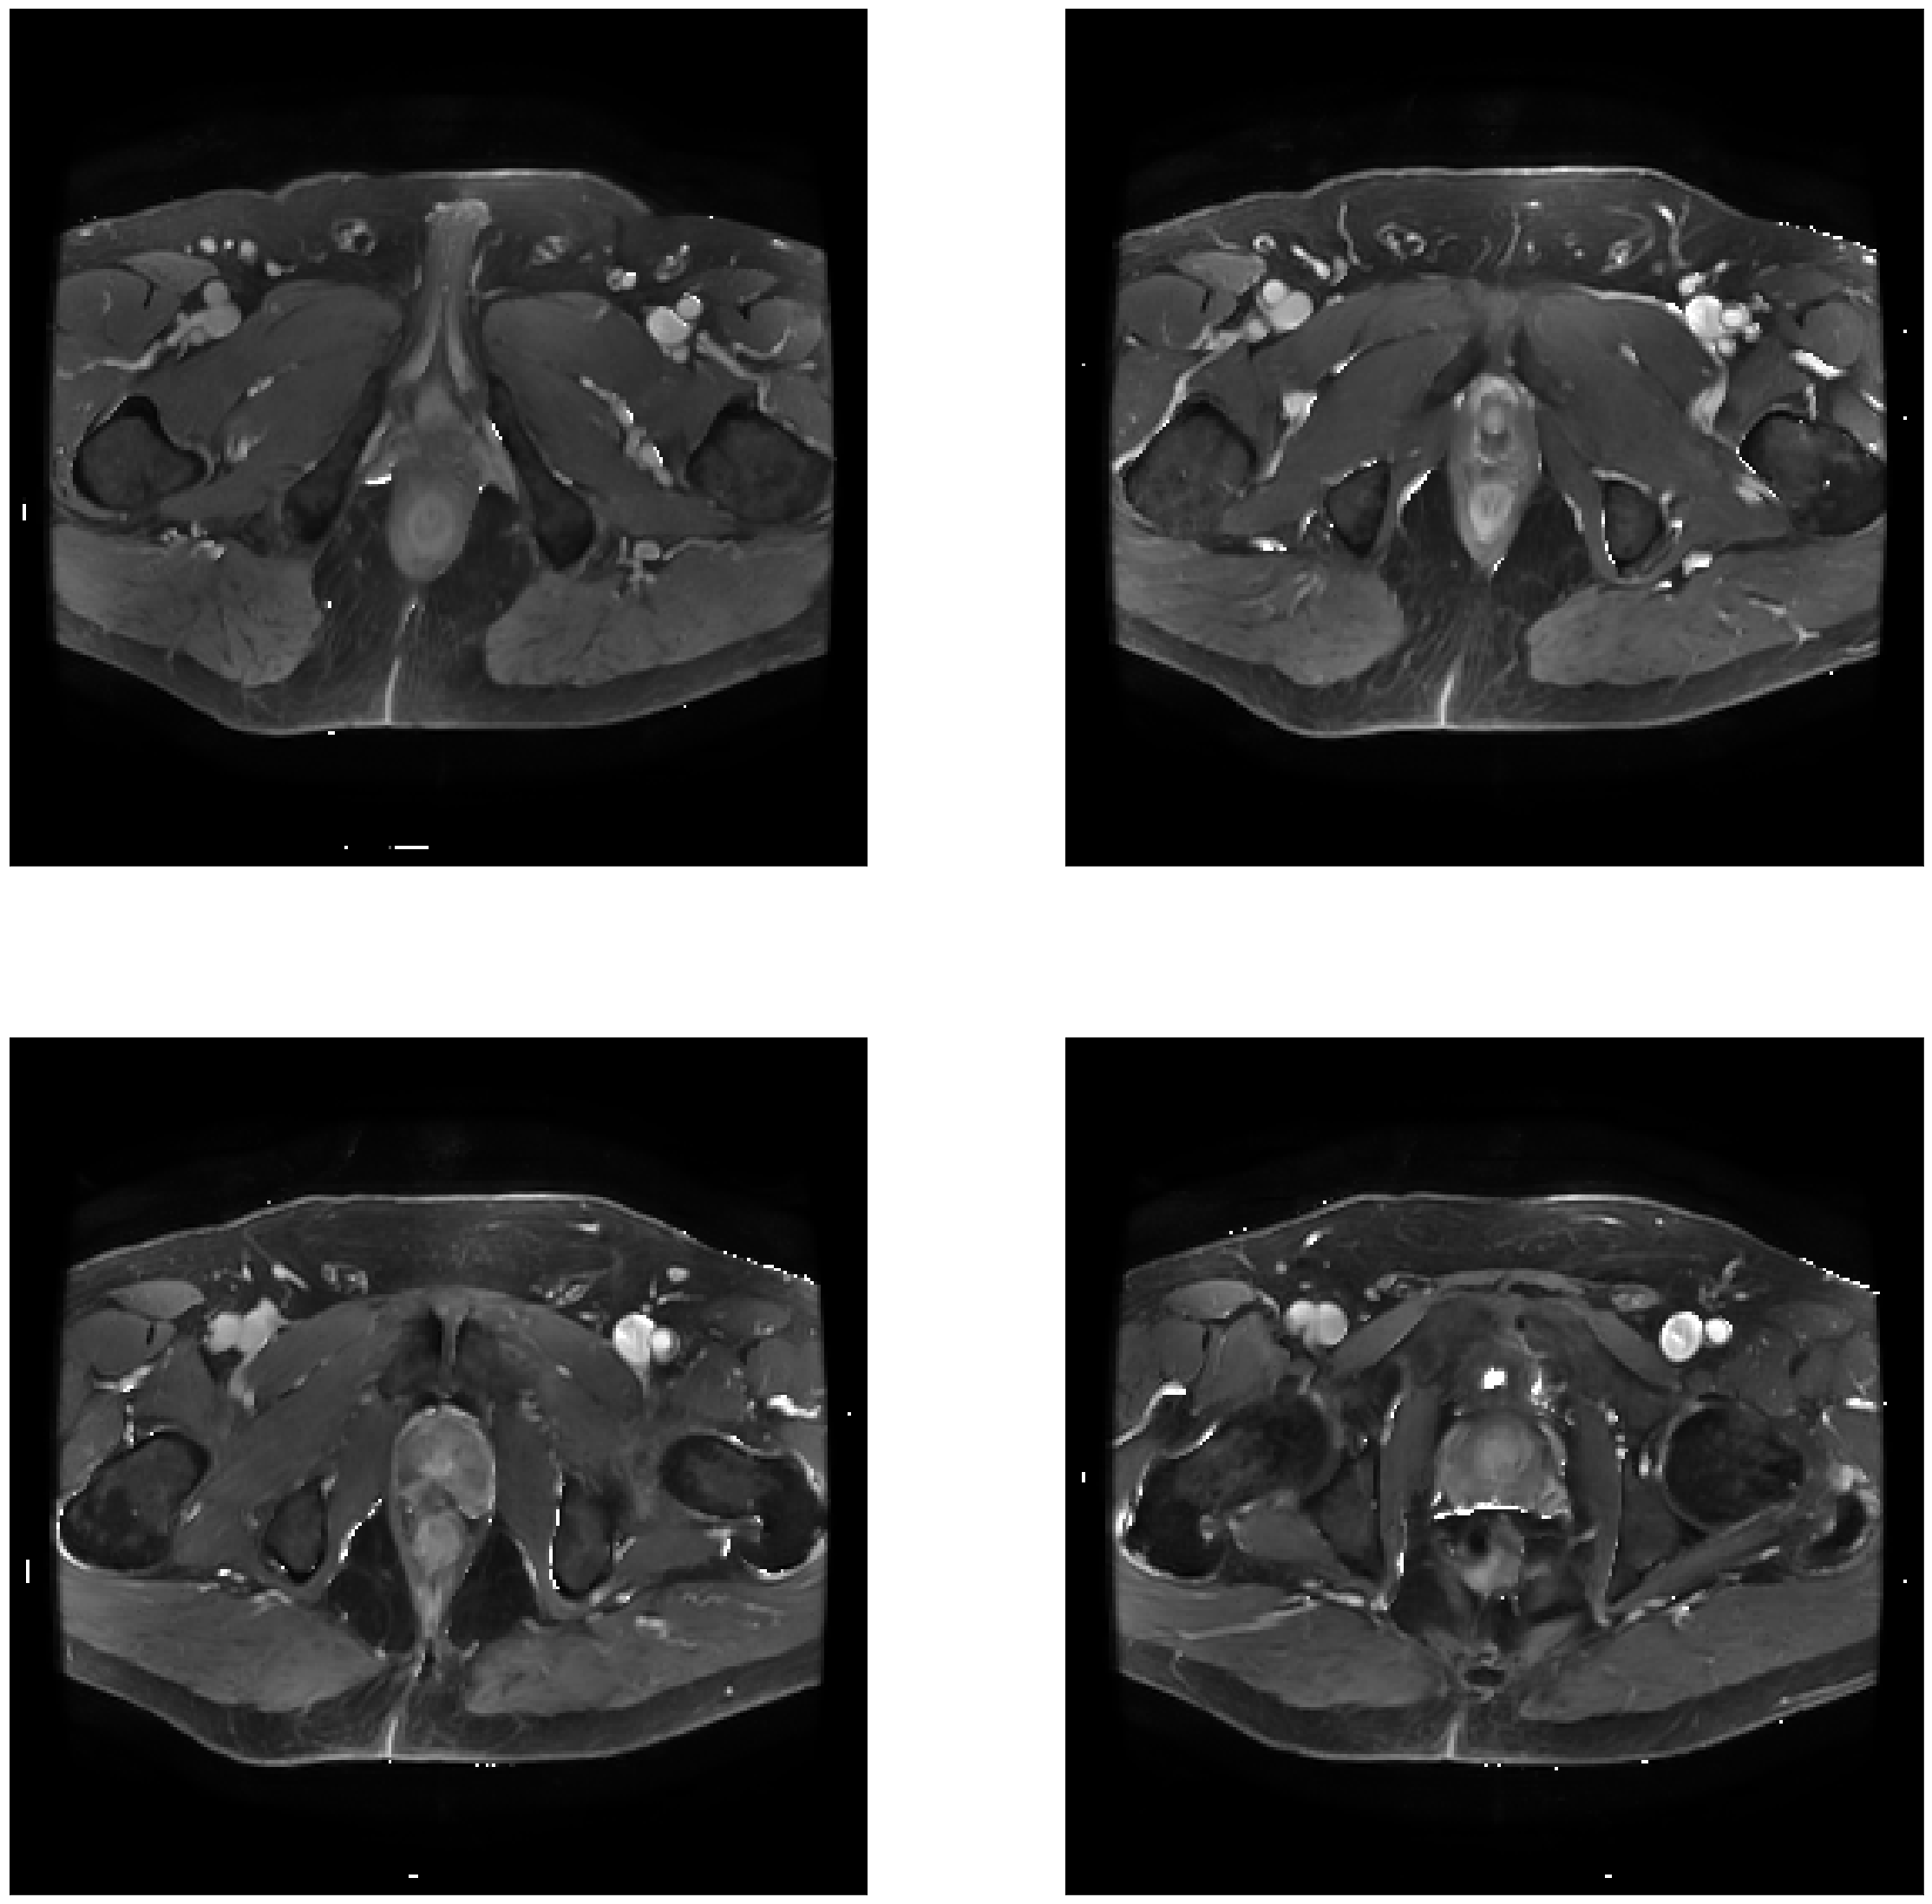

In [34]:
import matplotlib.pyplot as plt

plane = 2

plt.figure(figsize=(40,40))

plt.subplot(2,2,1)
plt.xticks([])
plt.yticks([])

plt.imshow(np.rot90(ve[:,:,plane]), cmap='gray', vmin = 0, vmax = 1)

plt.subplot(2,2,2)
plt.xticks([])
plt.yticks([])

plt.imshow(np.rot90(ve[:,:,plane+10]), cmap='gray', vmin = 0, vmax = 1)

plt.subplot(2,2,3)
plt.xticks([])
plt.yticks([])

plt.imshow(np.rot90(ve[:,:,plane+20]), cmap='gray', vmin = 0, vmax = 1)

plt.subplot(2,2,4)
plt.xticks([])
plt.yticks([])

plt.imshow(np.rot90(ve[:,:,plane+30]), cmap='gray', vmin = 0, vmax = 1)


## Free resources

Finally, once our experimentation has been concluded, free the cluster resources using %apricot destroy instruction

In [35]:
%apricot destroy $clusterName

Success deleting the cluster!



'done'

## Conclusion

At this notebook, we have fitted a real MRI image using a perfusion model to obtain the transfer coefficient between blood plasma and the compartment, and the extracellular extravascular fractional volume. This results are fully reproducible using this notebook and some supported cloud provider to deploy the required infrastructure.